TASK 1A

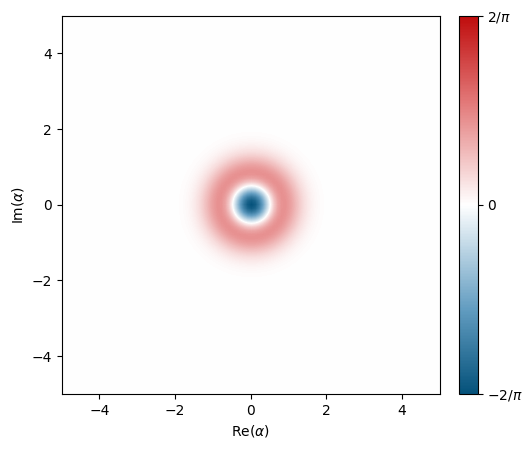

In [ ]:
"FockStateGen"
import dynamiqs as dq
fock = dq.states.fock
plot_wigner = dq.plot.wigner
import matplotlib.pyplot as plt  

#Fock Sim
state = fock(10, 1) #Initialize Fock state with dimension 10 and 1 quanta
plot_wigner(state)
plt.show() 

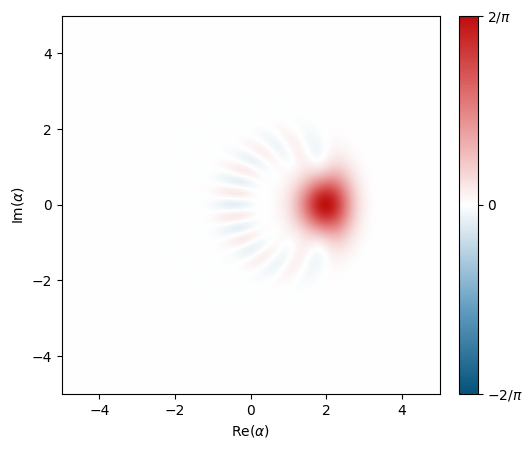

In [8]:
"CoherentStateGen"

import dynamiqs as dq
import numpy as np
coherent = dq.states.coherent
plot_wigner = dq.plot.wigner
import matplotlib.pyplot as plt  


#Coherent Sim
alpha = 2.0                 #set alpha(displacement of state in phase space)
state = coherent(10, alpha) #coherent state with 10 dimensions and alpha value
plot_wigner(state)
plt.show()

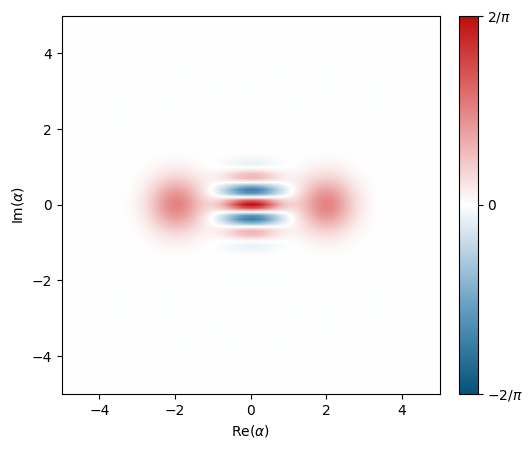

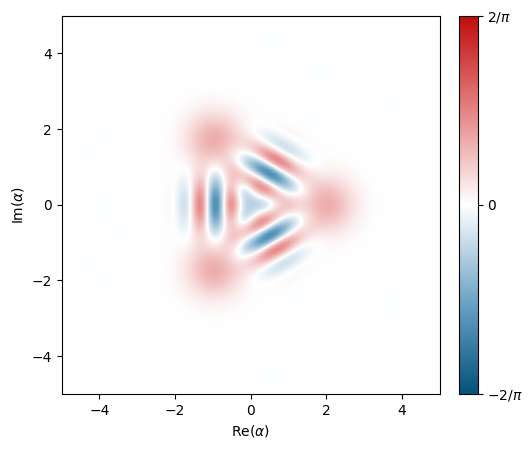

In [ ]:
"CatStateGens"

import dynamiqs as dq
import numpy as np
coherent = dq.states.coherent
plot_wigner = dq.plot.wigner
import matplotlib.pyplot as plt  

#2-Cat Sim
psi = (dq.coherent(20, 2) + dq.coherent(20, -2)).unit() #Choose two points each equal distance apart(180deg)
dq.plot.wigner(psi)
plt.show()

#3-Cat Sim
psi = (dq.coherent(20, 2) + 
       dq.coherent(20, 2*np.exp(1j*2*np.pi/3)) + 
       dq.coherent(20, 2*np.exp(1j*4*np.pi/3))
      ).unit()                                           #Choose 3 ponts each equal distance apart(120 deg)
dq.plot.wigner(psi)
plt.show()

|██████████| 100.0% ◆ elapsed 71.90ms ◆ remaining 0.00ms
100%|██████████| 50/50 [00:08<00:00,  6.04it/s]


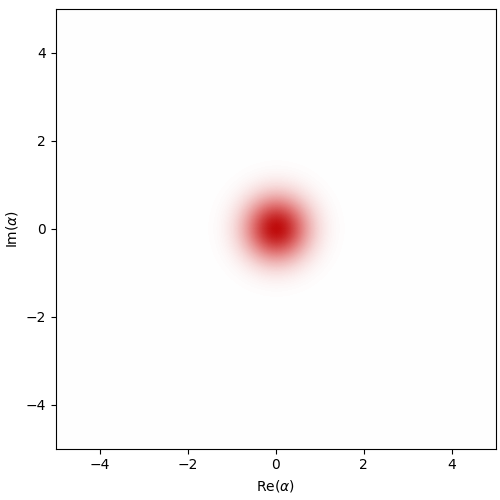

In [17]:
"DisCatStateGen"
""""Dissipative Cat State from a Two-Photon Exchange Hamiltonian Generation"""

import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

# simulation parameters
n = 5         # Hilbert space size
g= 1
epsilon = -4
kappa = 10
ntsave = 201   # number of saved states
T = 4

# operators
a = dq.tensor(dq.destroy(n), np.eye(n))   #memory
b = dq.tensor(np.eye(n), dq.destroy(n))   #buffer


H = g * a.dag() @ a.dag() @ b + g * a @ a @ b.dag() + epsilon * (b + b.dag()) #Hamiltonian
jump_ops = [jnp.sqrt(kappa) * b] #jump operator, utilize the buffer

# initial state
psi0 = dq.tensor(dq.basis(n, 0), (dq.basis(n, 0)))

# save times
tsave = jnp.linspace(0.0, T, ntsave)

# run simulation
result = dq.mesolve(H, jump_ops, psi0, tsave)

dq.plot.wigner_gif(result.states)